# Import necessary Libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


## Load the dataset.

In [4]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Dataset.csv.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
# Importing regular expression module
import re

# Define a function to clean text.
def remove_non_printable(text):
    if isinstance(text, str):
        return re.sub(r'[^\x20-\x7E]', '', text)
    return text

# applying function to all.
df = df.applymap(remove_non_printable)

C:\Users\HP\AppData\Local\Temp\ipykernel_17116\1234330207.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_non_printable)


In [6]:
# Rechecking the dataset after removing non printable items.

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Dataset Information

In [8]:
# Checking datatypes of fetaure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
# Checking duplicates

print('The duplicates present in dataset:',df.duplicated().sum())

The duplicates present in dataset: 0


In [10]:
# Checking null values

print('The Null values present in dataset:',df.isnull().sum())
print('\nThe percentage of null values present:',df.isnull().sum()/len(df) * 100)

The Null values present in dataset: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

The percentage of null values present: Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Cu

In [11]:
# view descriptive analysis

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
df.describe(include='O')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [13]:
# Remove the rows where Cuisine is null.

df.dropna(subset=['Cuisines'],inplace=True)

In [14]:
print('The unique values of Cuisines:',df['Cuisines'].nunique())

The unique values of Cuisines: 1825


In [15]:
df['Cuisines'] = df['Cuisines'].apply(lambda x:x.split(',')[0].strip())
print('The unique values after turns into Cuisines :', df['Cuisines'].nunique())

The unique values after turns into Cuisines : 119


In [16]:
print('The number of unique present in numerical features:\n', df.select_dtypes(include='number').nunique())

The number of unique present in numerical features:
 Restaurant ID           9542
Country Code              15
Longitude               8111
Latitude                8668
Average Cost for two     140
Price range                4
Aggregate rating          33
Votes                   1012
dtype: int64


In [17]:
print('The value count in Country Code:',df['Country Code'].value_counts())
print('\nThe value count in Rating text:',df['Rating text'].value_counts())
print('\nThe value count in Price range:',df['Price range'].value_counts())

The value count in Country Code: Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

The value count in Rating text: Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

The value count in Price range: Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64


## Irrelevant Columns.

In [19]:
cols_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address',
    'Locality Verbose', 'Switch to order menu', 'Rating color','Currency'
]

df.drop(columns = cols_to_drop, inplace=True)

## Detecting and removing Outliers

In [21]:
numerical_columns = ['Average Cost for two','Aggregate rating','Votes']

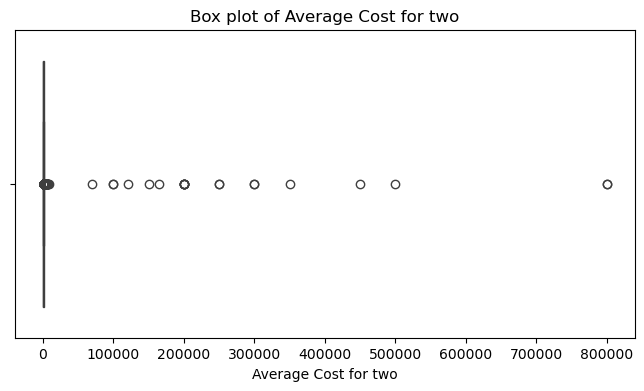

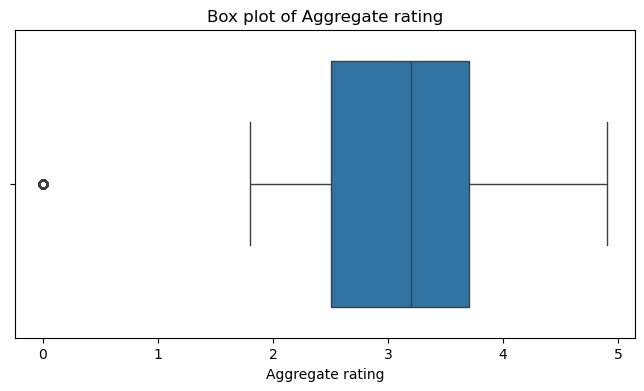

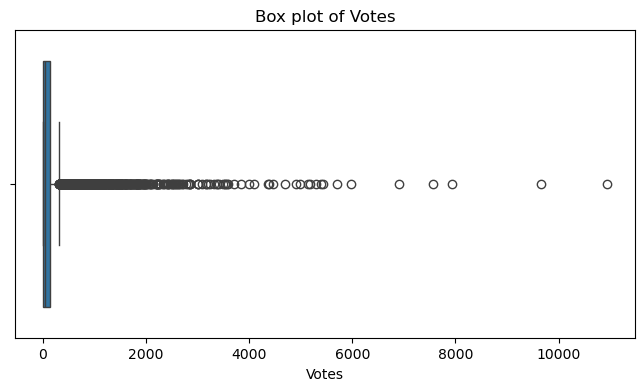

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df,x=col)
    plt.title(f'Box plot of {col}')

## Distribution of Numerical columns

In [24]:
print('The skewness of numerical columns are:', df[numerical_columns].skew())
print('The kurtosis of numerical columns are:',df[numerical_columns].kurtosis())

The skewness of numerical columns are: Average Cost for two    35.461264
Aggregate rating        -0.953052
Votes                    8.813270
dtype: float64
The kurtosis of numerical columns are: Average Cost for two    1494.371209
Aggregate rating          -0.584832
Votes                    128.316022
dtype: float64


## IQR Method for removing Outliers

In [26]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


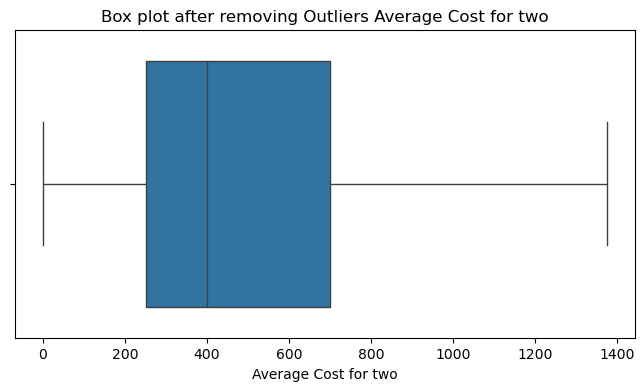

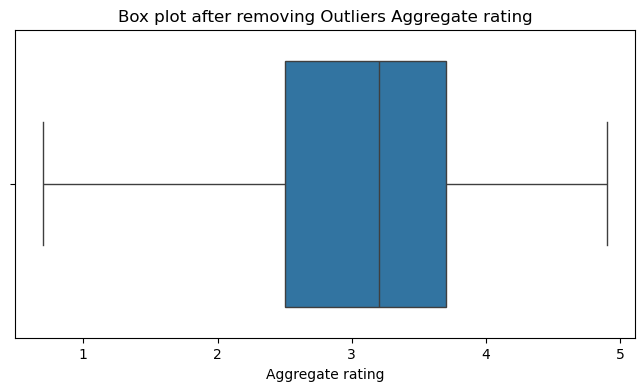

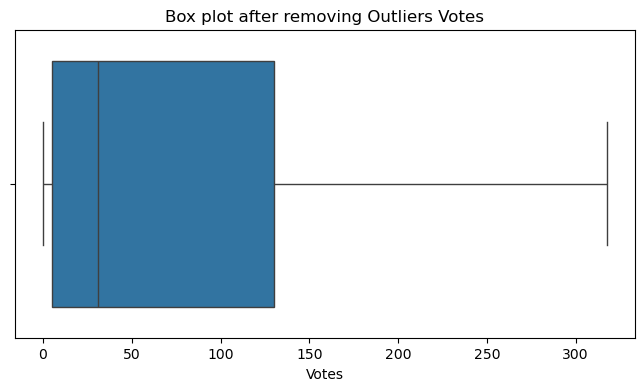

In [27]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df,x=col)
    plt.title(f'Box plot after removing Outliers {col}')

In [28]:
print('The skewness of Numerical columns after removing Outliers:\n',df[numerical_columns].skew())
print('The kurtosis of Numerical columns after removing Outliers:\n',df[numerical_columns].kurtosis())
      

The skewness of Numerical columns after removing Outliers:
 Average Cost for two    0.984675
Aggregate rating       -0.783333
Votes                   1.222367
dtype: float64
The kurtosis of Numerical columns after removing Outliers:
 Average Cost for two    0.127683
Aggregate rating       -0.701315
Votes                   0.016758
dtype: float64


## Correlation Heatmap

<Axes: >

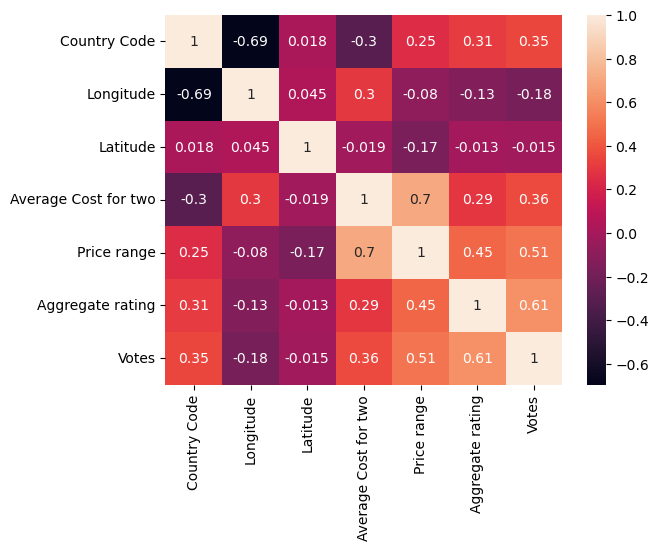

In [30]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot =True)

In [31]:
# From the heatmap there is highly negative correlation between Country Code and Longitude of -0.69

# Data Visualization

## 1. Restaurants by Country Code.

Text(0.5, 1.0, 'Number of Restaurants by Country Code')

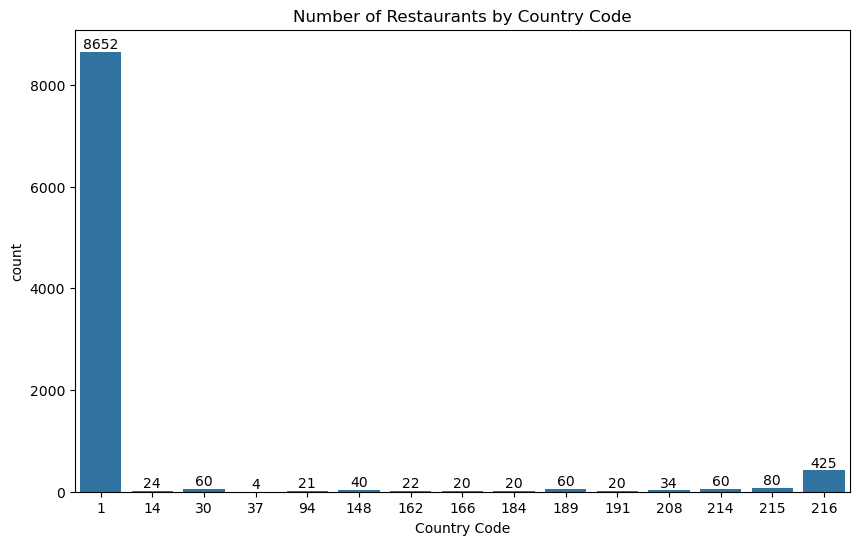

In [34]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df,x='Country Code')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Restaurants by Country Code')

## 2. Top Cuisines Overall

Text(0.5, 1.0, 'Top 20 Most Popular Cuisines')

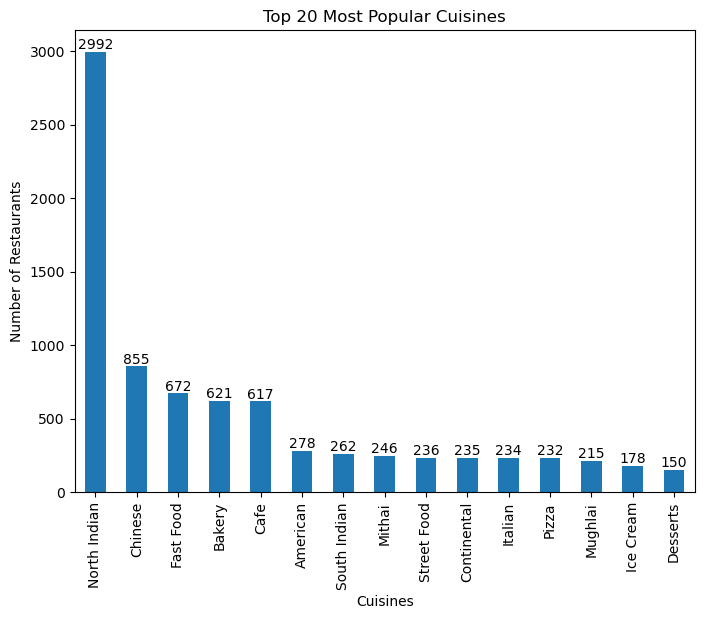

In [36]:
plt.figure(figsize=(8,6))
ax=df['Cuisines'].value_counts().head(15).plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.title('Top 20 Most Popular Cuisines')

## 3. Expensive Cuisines.

Text(0.5, 1.0, 'Top 10 Expensive Cuisines')

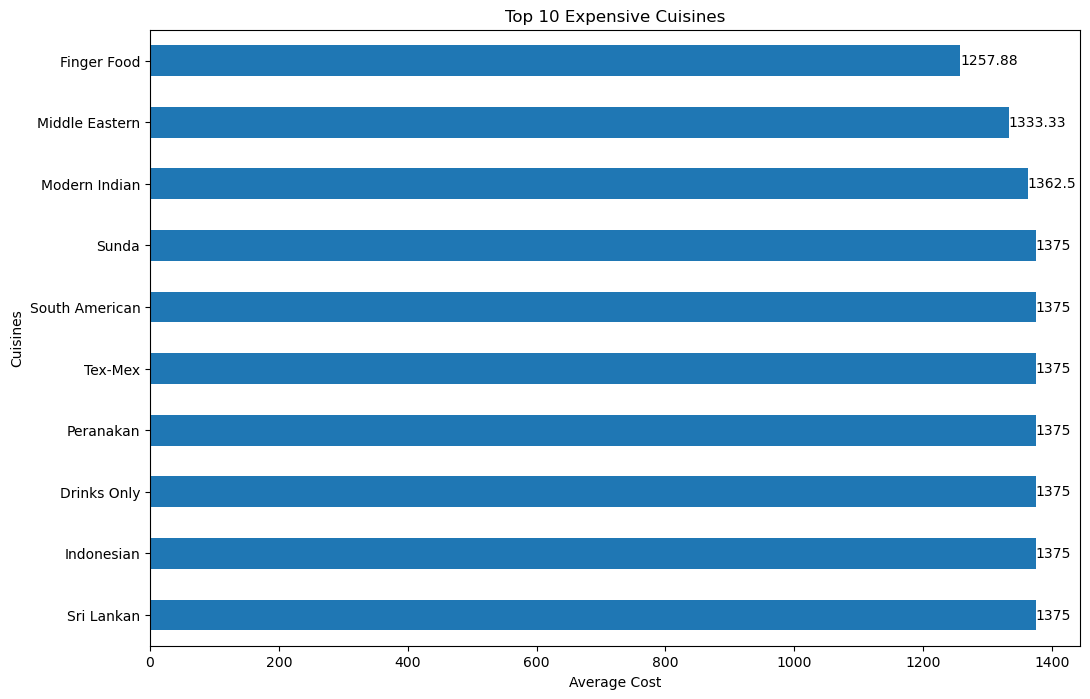

In [38]:
plt.figure(figsize=(12,8))
ax = df.groupby('Cuisines')['Average Cost for two'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Average Cost')
plt.ylabel('Cuisines')
plt.title('Top 10 Expensive Cuisines')



## 4. Affordable Cuisines.

Text(0.5, 1.0, 'Top 10 affordable Cuisines')

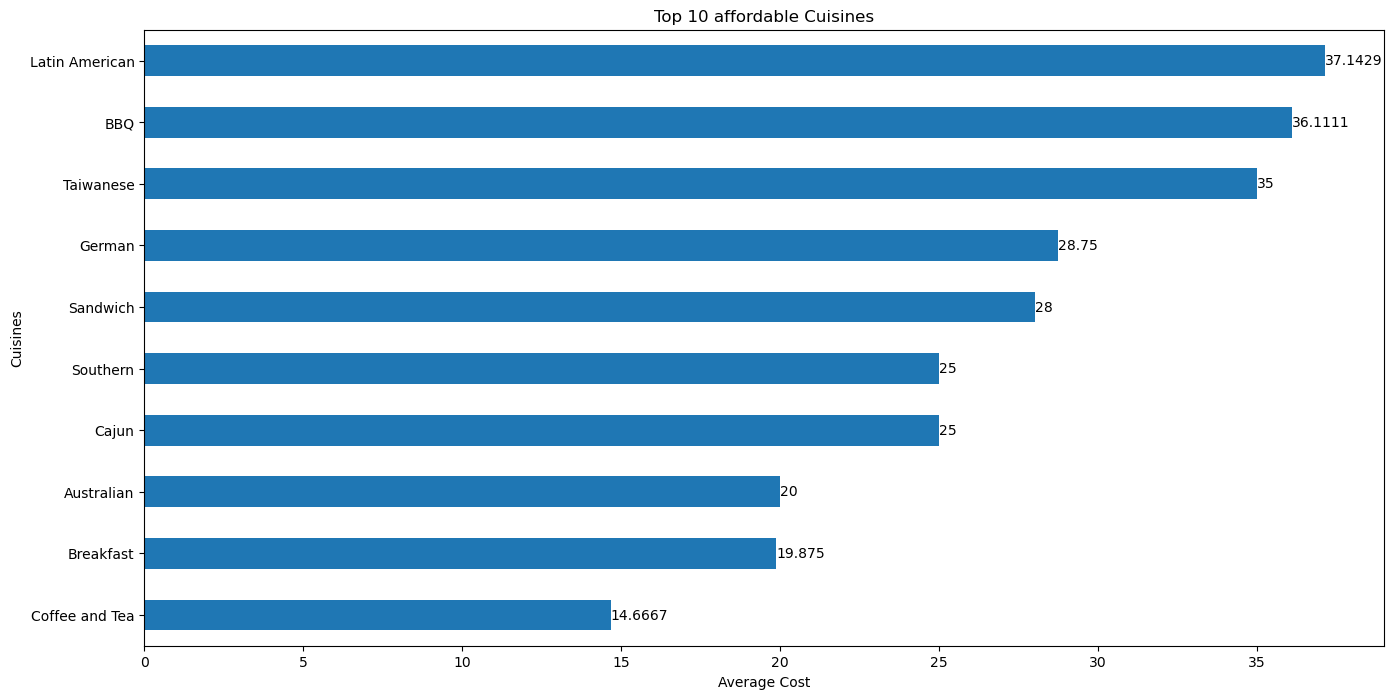

In [40]:
plt.figure(figsize=(16,8))
ax = df.groupby('Cuisines')['Average Cost for two'].mean().sort_values().head(10).plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Average Cost')
plt.ylabel('Cuisines')
plt.title('Top 10 affordable Cuisines')

## 5. High Rated Cuisines

Text(0.5, 1.0, 'Top 10 High Rated Cuisines')

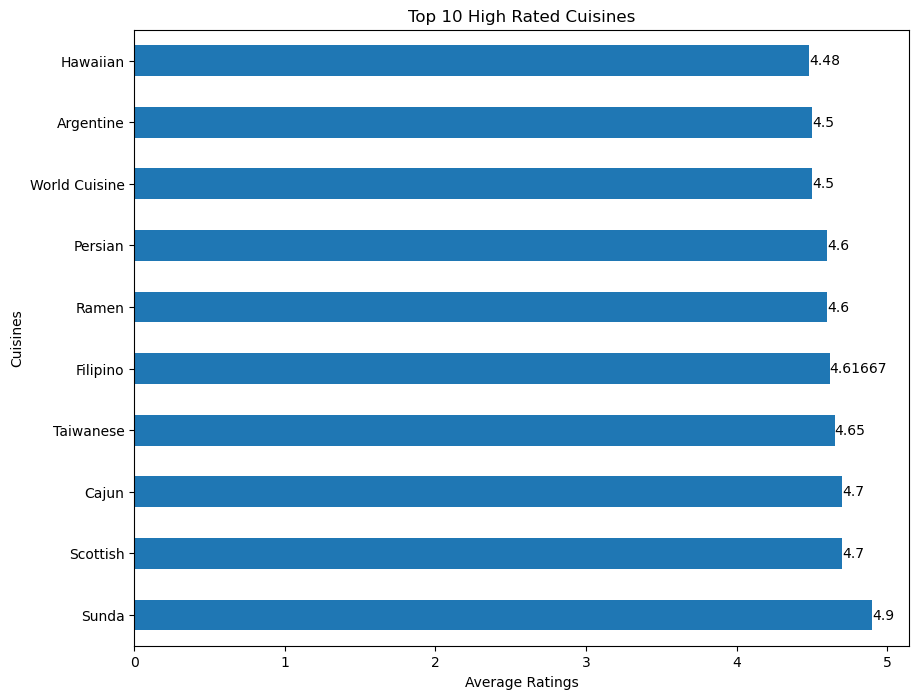

In [42]:
plt.figure(figsize=(10,8))
ax = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Average Ratings')
plt.ylabel('Cuisines')
plt.title('Top 10 High Rated Cuisines')

## 6. Low Rated Cuisines.

Text(0.5, 1.0, 'Top 10 Low rated Cuisines')

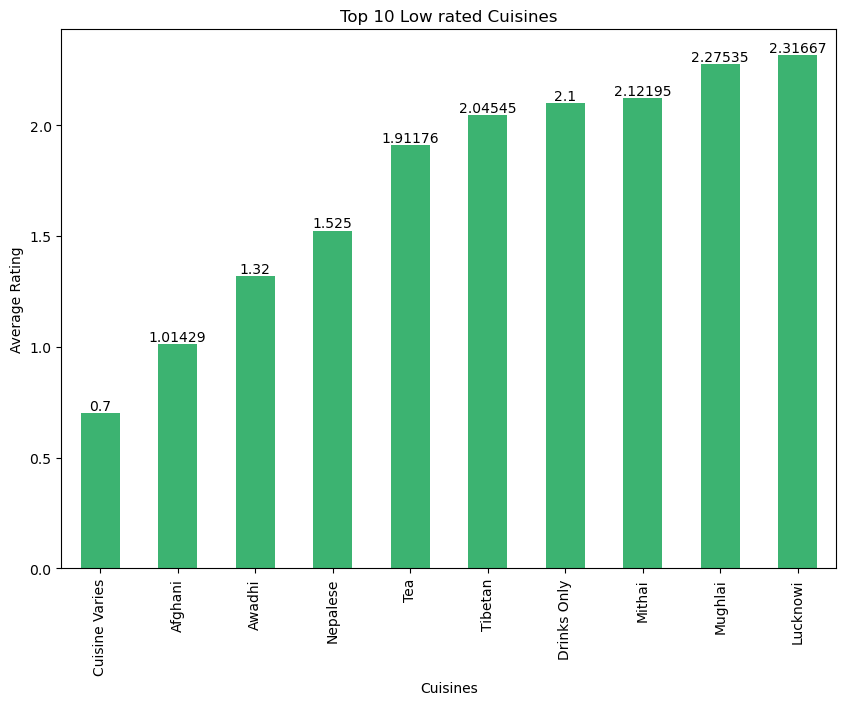

In [44]:
plt.figure(figsize=(10,7))
low_rated =  df.groupby('Cuisines')['Aggregate rating'].mean().sort_values().head(10)
ax = low_rated.plot(kind='bar',color='mediumseagreen')
for i in ax.containers:
    ax.bar_label(i)

plt.ylabel('Average Rating')
plt.title('Top 10 Low rated Cuisines')

## 7. City with Best Cuisines

Text(0.5, 1.0, 'Top 5 City with best Cuisines')

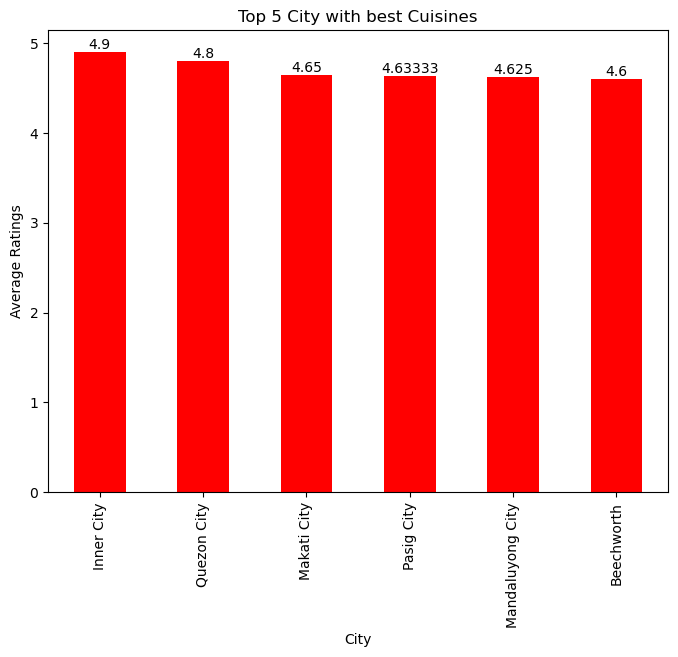

In [46]:
plt.figure(figsize=(8,6))
ax = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(6).plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i)

plt.ylabel('Average Ratings')
plt.title('Top 5 City with best Cuisines')

## 8. Average Votes by Primary Cuisine

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Argentine'),
  Text(1, 0, 'African'),
  Text(2, 0, 'American'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Andhra'),
  Text(5, 0, 'Arabian'),
  Text(6, 0, 'Assamese'),
  Text(7, 0, 'Australian'),
  Text(8, 0, 'Asian Fusion'),
  Text(9, 0, 'Afghani')])

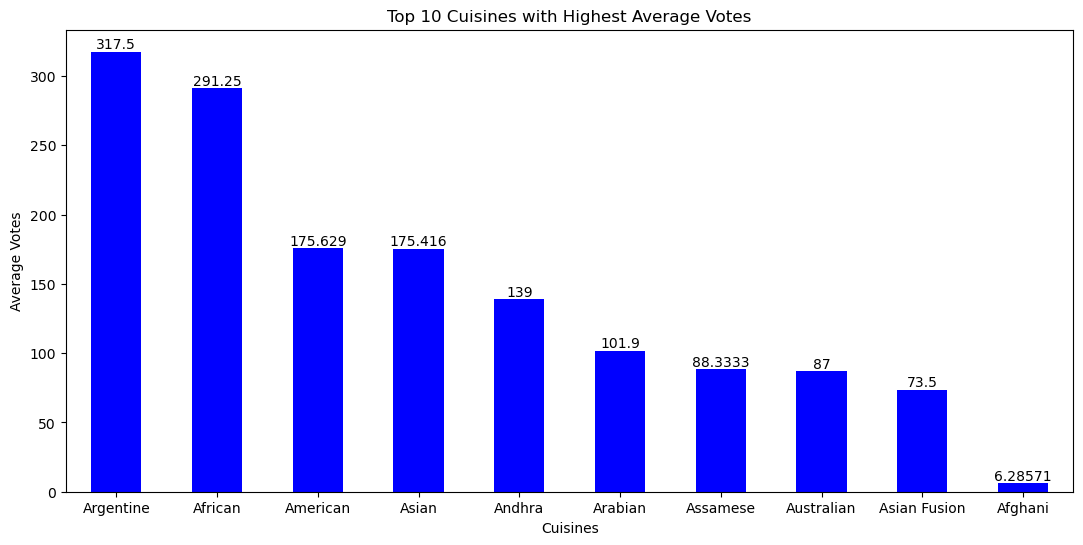

In [48]:
plt.figure(figsize=(13,6))
ax = df.groupby('Cuisines')['Votes'].mean().head(10).sort_values(ascending=False).plot(kind='bar',color='blue')
for i in ax.containers:
    ax.bar_label(i)

plt.ylabel('Average Votes')
plt.title('Top 10 Cuisines with Highest Average Votes')
plt.xticks(rotation=0)

In [49]:
# Defining a function called group_cuisine to group similiar cuisines into categories.

def group_cuisine(cuisine):
    cuisine = cuisine.lower()

    indian = ['north indian', 'south indian', 'biryani', 'mithai', 'mughlai', 'kerala', 'kashmiri',
              'hyderabadi', 'goan', 'bengali', 'awadhi', 'rajasthani', 'maharashtrian', 'andhra',
              'gujarati', 'lucknowi', 'malwani', 'oriya', 'assamese', 'naga', 'bihari']
    
    asian = ['chinese', 'thai', 'japanese', 'korean', 'vietnamese', 'malaysian', 'indonesian',
             'sushi', 'asian', 'asian fusion', 'filipino', 'taiwanese', 'singaporean']
    
    western = ['american', 'continental', 'italian', 'mexican', 'european', 'french', 'spanish',
               'german', 'british', 'portuguese', 'greek', 'new american', 'irish', 'australian']
    
    cafe_fastfood = ['fast food', 'street food', 'pizza', 'burger', 'sandwich', 'raw meats',
                     'charcoal grill', 'cafe', 'coffee and tea', 'tea', 'beverages', 'juices',
                     'drinks only', 'restaurant cafe', 'bakery', 'desserts', 'ice cream',
                     'patisserie', 'gourmet fast food']

    if cuisine in indian:
        return 'Indian'
    elif cuisine in asian:
        return 'Asian'
    elif cuisine in western:
        return 'Western'
    elif cuisine in cafe_fastfood:
        return 'Cafe & Fast Food'
    else:
        return 'Other'

    
        

In [50]:
# Applying the function to Primary Cuisine

df['Cuisines'] = df['Cuisines'].apply(group_cuisine)
print('The counts of cuisines after grouping:',df['Cuisines'].value_counts())

The counts of cuisines after grouping: Cuisines
Indian              3941
Cafe & Fast Food    3063
Asian               1077
Western              920
Other                541
Name: count, dtype: int64


In [51]:
# Grouped the cusisine into 5 clasess, but here Indian dominates most. While Other is under represented. There is high class
# imbalance. So remove 'Other'

df = df[df['Cuisines']!='Other']

print('The shape of the dataset after removel of Other:', df.shape)

The shape of the dataset after removel of Other: (9001, 14)


## Handling Categorical Data

In [53]:
print('The feature in the dataset are:\n',df.columns)

The feature in the dataset are:
 Index(['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Rating text',
       'Votes'],
      dtype='object')


In [54]:
cat_columns = ['City','Locality','Cuisines','Has Table booking','Has Online delivery','Is delivering now','Rating text']

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_17116\3758694344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_17116\3758694344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_17116\3758694344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [55]:
print('Dataset after encoding:',df)

Dataset after encoding:       Country Code  City  Locality   Longitude   Latitude  Cuisines  \
0              162    68       142  121.027535  14.565443         3   
1              162    68       523  121.014101  14.553708         0   
3              162    70       758  121.056475  14.585318         0   
4              162    70       758  121.057508  14.584450         0   
5              162    70       758  121.056314  14.583764         0   
...            ...   ...       ...         ...        ...       ...   
9544           208   127       457   28.977636  41.022904         1   
9545           208   127       457   28.981103  41.025785         1   
9548           208   127       490   29.034640  41.055817         3   
9549           208   127       490   29.036019  41.057979         1   
9550           208   127       588   29.026016  40.984776         1   

      Average Cost for two  Has Table booking  Has Online delivery  \
0                     1100                  1        

## Feature Selection

In [57]:
X = df.drop(columns=['Cuisines','Country Code','Latitude','Longitude'])
y = df['Cuisines']

In [58]:
selector = SelectKBest(score_func=chi2,k='all')
chi2_scores = selector.fit(X,y)

chi2_result = pd.DataFrame({
    'Feature':X.columns,
    'Chi2_score':chi2_scores.scores_,
    'p-Value':chi2_scores.pvalues_}).sort_values(by='Chi2_score',ascending=False)

In [59]:
chi2_result

,Feature,Chi2_score,p-Value
2,Average Cost for two,170783.707663,0.000000e+00
9,Votes,117587.294043,0.000000e+00
1,Locality,6431.207620,0.000000e+00
6,Price range,626.041171,2.279401e-135
3,Has Table booking,469.471604,1.968807e-101
0,City,437.375922,1.771668e-94
8,Rating text,372.839447,1.689678e-80
7,Aggregate rating,312.606245,1.858822e-67
4,Has Online delivery,9.172387,2.708457e-02
5,Is delivering now,5.827561,1.203079e-01


In [60]:
# Is delivering now is the columns having p-value greater than 0.05

insignificant_columns = chi2_result[chi2_result['p-Value']>0.05]
insignificant_columns = chi2_result[chi2_result['p-Value']>0.05]['Feature'].tolist()
print('The insignificant column is :',insignificant_columns)

The insignificant column is : ['Is delivering now']


In [61]:
# Dropping feature Is delivering now
X.drop(columns = insignificant_columns,axis=1, inplace=True)

In [62]:
print('The features in the dataset are:\n', df.columns)


The features in the dataset are:
 Index(['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Rating text',
       'Votes'],
      dtype='object')


In [63]:
X.shape

(9001, 9)

In [64]:
# Check class balance  
df['Cuisines'].value_counts(normalize=True)


Cuisines
2    0.437840
1    0.340296
0    0.119653
3    0.102211
Name: proportion, dtype: float64

## Split X and y

In [66]:
X=df.drop(columns=['Cuisines','Country Code'],axis=1)

In [67]:
y = df['Cuisines']

In [68]:
X

,City,Locality,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,68,142,121.027535,14.565443,1100,1,0,0,3,4.8,1,314.0
1,68,523,121.014101,14.553708,1200,1,0,0,3,4.5,1,317.5
3,70,758,121.056475,14.585318,1375,0,0,0,4,4.9,1,317.5
4,70,758,121.057508,14.584450,1375,1,0,0,4,4.8,1,229.0
5,70,758,121.056314,14.583764,1000,0,0,0,3,4.4,5,317.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9544,127,457,28.977636,41.022904,40,0,0,0,2,4.7,1,317.5
9545,127,457,28.981103,41.025785,90,0,0,0,3,4.3,5,317.5
9548,127,490,29.034640,41.055817,170,0,0,0,4,3.7,2,317.5
9549,127,490,29.036019,41.057979,120,0,0,0,4,4.0,5,317.5


 # Train Test Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,stratify=y,random_state=42)

In [71]:
print('The shape of X train is:',X_train.shape)
print('The shape of X test is:',X_test.shape)
print('The shape of y train is:',y_train.shape)
print('The shape of X train is:',y_test.shape)


The shape of X train is: (7200, 12)
The shape of X test is: (1801, 12)
The shape of y train is: (7200,)
The shape of X train is: (1801,)


## Scale Numerical Features.

In [73]:
numerical_cols = ['Average Cost for two',
                  'Price range','Aggregate rating','Votes','Latitude','Longitude']
scaler = MinMaxScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [74]:
# Intialize SMOTE
# Smote is a powerful technique used in imbalanced classification to balance the dataset by generating synthetic example class.

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

# Model Implementation and Evaluation

## Logistic Regression

In [77]:
lr = LogisticRegression(multi_class='multinomial',max_iter=1000,random_state=42)
lr.fit(X_train_resampled,y_train_resampled)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test,y_pred_lr)
conf_lr = confusion_matrix(y_test,y_pred_lr)
clf_rp_lr = classification_report(y_test,y_pred_lr)

print(f'Accuracy of Logistic Regression is :{acc_lr}')
print(f'Confusion Matrix of Logistic Regression is :\n{conf_lr}')
print(f'Classification Report of Logistic Regression is :\n{clf_rp_lr}')


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression is :0.43808995002776235
Confusion Matrix of Logistic Regression is :
[[ 17  69  77  52]
 [ 65 331 132  85]
 [ 89 282 322  96]
 [  4  22  39 119]]
Classification Report of Logistic Regression is :
              precision    recall  f1-score   support

           0       0.10      0.08      0.09       215
           1       0.47      0.54      0.50       613
           2       0.56      0.41      0.47       789
           3       0.34      0.65      0.44       184

    accuracy                           0.44      1801
   macro avg       0.37      0.42      0.38      1801
weighted avg       0.45      0.44      0.43      1801



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Gradient Boosting Classifier

In [79]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_resampled,y_train_resampled)

y_pred_gbc = gbc.predict(X_test)

acc_gbc = accuracy_score(y_test,y_pred_gbc)
conf_gbc = confusion_matrix(y_test,y_pred_gbc)
clf_rpt_gbc = classification_report(y_test,y_pred_gbc)

print(f'Accuracy score of Gradient Boosting Classifier is :{acc_gbc}')
print(f'Confusion Matrix of Gradient Boosting Classifier is : \n{conf_gbc}')
print(f'Classification Report of Gradient Boosting Classifier is: \n{clf_rpt_gbc}')

Accuracy score of Gradient Boosting Classifier is :0.5397001665741255
Confusion Matrix of Gradient Boosting Classifier is : 
[[ 20  51  97  47]
 [ 29 345 189  50]
 [ 24 187 498  80]
 [  8  16  51 109]]
Classification Report of Gradient Boosting Classifier is: 
              precision    recall  f1-score   support

           0       0.25      0.09      0.14       215
           1       0.58      0.56      0.57       613
           2       0.60      0.63      0.61       789
           3       0.38      0.59      0.46       184

    accuracy                           0.54      1801
   macro avg       0.45      0.47      0.45      1801
weighted avg       0.53      0.54      0.53      1801



## Decision Tree Classifier

In [81]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_resampled,y_train_resampled)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf_dtc = confusion_matrix(y_test, y_pred_dtc)
clf_report_dtc = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf_dtc}")
print(f"Classification Report : \n{clf_report_dtc}")

Accuracy Score of Decision Tree is : 0.441976679622432
Confusion Matrix : 
[[ 39  67  73  36]
 [ 73 279 220  41]
 [102 210 399  78]
 [ 29  29  47  79]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.16      0.18      0.17       215
           1       0.48      0.46      0.47       613
           2       0.54      0.51      0.52       789
           3       0.34      0.43      0.38       184

    accuracy                           0.44      1801
   macro avg       0.38      0.39      0.38      1801
weighted avg       0.45      0.44      0.45      1801



## Random Forest Classifier

In [83]:
rd_clf = RandomForestClassifier(random_state=42)
rd_clf.fit(X_train_resampled,y_train_resampled)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf_rd_clf = confusion_matrix(y_test, y_pred_rd_clf)
clf_reportrd_clf = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf_rd_clf}")
print(f"Classification Report : \n{clf_reportrd_clf}")

Accuracy Score of Random Forest is : 0.5130483064963909
Confusion Matrix : 
[[ 29  63  85  38]
 [ 38 331 203  41]
 [ 43 206 472  68]
 [ 13  19  60  92]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.24      0.13      0.17       215
           1       0.53      0.54      0.54       613
           2       0.58      0.60      0.59       789
           3       0.38      0.50      0.43       184

    accuracy                           0.51      1801
   macro avg       0.43      0.44      0.43      1801
weighted avg       0.50      0.51      0.50      1801



In [84]:
models = pd.DataFrame({
    'Model' : [ 'Logistic Regression', 'Gradient Boosting Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [ acc_lr, acc_gbc, acc_dtc, acc_rd_clf]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Gradient Boosting Classifier,0.539700
3,Random Forest Classifier,0.513048
2,Decision Tree Classifier,0.441977
0,Logistic Regression,0.438090


## Idendified Challenges